# 1. Método de Euler (RK1)

Por medio del método de Euler resolver la siguiente ecuación diferencial, 

$\frac{dy}{dx}=f(x)=5x^3-4x^2-x$,

con condición inicial $y(0)=1$.

In [1]:
# Paquetes
import numpy as np
import matplotlib.pyplot as plt

En el método de Euler se aproxima la pendiente $\phi$ a la parte derecha de la ecuación diferencial, de manera que en nuestro caso,

$\phi = f(x) = -5x^3+4x^2+x$

y la solución se obtiene como

$y_{i+1}=y_i + f(x_i)\Delta x$, 

donde $\Delta x = x_{i+1} - x_{i}$

In [44]:
# definimos la función f(x) para la pendiente y la condición inicial:

def f(x): return 5*x**3 - 4*x**2 - x
y0 = 1

In [105]:
# Solución analítica

def y_exct(x): return (5/4)*x**4 - (4/3)*x**3 - 0.5*x**2 + 1

In [46]:
def RK1(xmin, xmax, n, f, y0):
    '''
    DESCRIPCION:Función para calcular la solución a un problema de valor inicial definido por una ecuación 
    diferencial ordinaria de primer orden, dy/dx = f(x), con condición inicial y0.
    
    INPUT: xmin, ymin son los límites inferior y superior del dominio numérico en el que se va a resolver la 
    ecuación diferencial. n es el número de puntos en la malla numerica, f es el right-hand side de la ecuación
    difencial y y0 es el valor de la solución en x=0 (condición inicial)
    
    OUTPUT: x, y_num son los valores de la variable independiente, x, donde se calculó la solución y_num.
    '''
    x = np.linspace(xmin,xmax,n)
    y_num = []
    dx = x[1] - x[0]
    y_prev = y0
    for i in range(len(x)):
        y_new = y_prev + f(x[i])*dx
        y_num.append(y_new)
        y_prev = y_new 
    return x, y_num

### Comparación con tres resoluciones

In [112]:
n1, n2, n3 = 500, 1000, 2000

In [48]:
y1 = RK1(0,15,n1,f,y0)
y2 = RK1(0,15,n2,f,y0)
y3 = RK1(0,15,n3,f,y0)

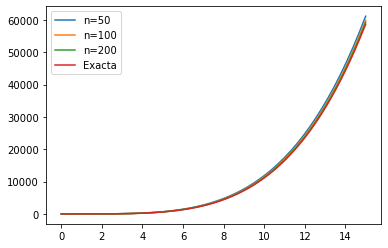

In [49]:
plt.plot(y1[0],y1[1],label=f'n={n1}')
plt.plot(y2[0],y2[1],label=f'n={n2}')
plt.plot(y3[0],y3[1],label=f'n={n3}')
plt.plot(y3[0],y_exct(y3[0]),label='Exacta')
plt.legend();

#### Error en el método de Euler

In [50]:
x1 = y1[0]
x2 = y2[0]
x3 = y3[0]
error1 = np.abs(y1[1] - y_exct(x1))*(100/y_exct(x1))
error2 = np.abs(y2[1] - y_exct(x2))*(100/y_exct(x2))
error3 = np.abs(y3[1] - y_exct(x3))*(100/y_exct(x3))

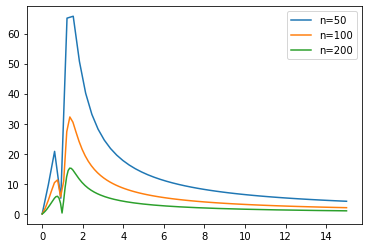

In [100]:
plt.plot(x1,error1,label=f'n={n1}')
plt.plot(x2,error2,label=f'n={n2}')
plt.plot(x3,error3,label=f'n={n3}')
plt.legend()

# 2. Método de Heun (RK2)

In [113]:
def RK2(xmin, xmax, n, f, y0):
    '''
    DESCRIPCION:Función para calcular la solución a un problema de valor inicial definido por una ecuación 
    diferencial ordinaria de primer orden, dy/dx = f(x), con condición inicial y0.
    
    INPUT: xmin, ymin son los límites inferior y superior del dominio numérico en el que se va a resolver la 
    ecuación diferencial. n es el número de puntos en la malla numerica, f es el right-hand side de la ecuación
    difencial y y0 es el valor de la solución en x=0 (condición inicial)
    
    OUTPUT: x, y_num son los valores de la variable independiente, x, donde se calculó la solución y_num.
    '''
    x = np.linspace(xmin,xmax,n)
    y_num = []
    h = x[1] - x[0]
    y_prev = y0
    for i in range(len(x)):
        k1 = f(x[i])
        k2 = f(x[i]+h)
        phi = 0.5*k1 + 0.5*k2
        y_new = y_prev + phi*h
        y_num.append(y_new)
        y_prev = y_new 
    return x, y_num

In [114]:
yRK2_1 = RK2(0,15,n1,f,y0)
yRK2_2 = RK2(0,15,n2,f,y0)
yRK2_3 = RK2(0,15,n3,f,y0)

In [115]:
error_2 = 100*np.abs(yRK2_2[1]-y_exct(yRK2_2[0]))/y_exct(yRK2_2[0])
error_3 = 100*np.abs(yRK2_3[1]-y_exct(yRK2_3[0]))/y_exct(yRK2_3[0])

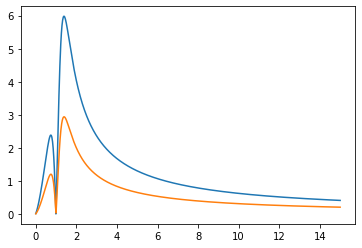

In [120]:
plt.plot(yRK2_2[0],error_2)
plt.plot(yRK2_3[0],error_3)
#plt.plot(yRK2_3[0],4*error_3,'o')

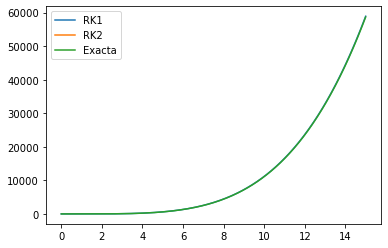

In [235]:
plt.plot(yRK2_2[0],yRK2_2[1],label='RK1')
plt.plot(y2[0],y2[1],label='RK2')
plt.plot(y3[0],y_exct(y3[0]),label='Exacta')
plt.legend()

## Error en el método de Heun

El método de Heun es de segundo orden, por lo tanto el error local es a tercer orden y el global a segundo. Para comproblar la convergencia del método, debemos demostrár que el error escala de la forma
$$\text{error} \approx Ch^2.$$
En escala logarítmica quedaría una recta de pendiente 2.

Para comparar el error global cuando aplicamos el método de Heun, vamos a calcular el Error Medio Cuadrático (MSE)
$$\text{MSE}=\frac{1}{N}\sum_{i=1}^{N}(y_{\text{pred}}-y_{\text{teo}})^2,$$ siendo $N$ el número de valores en la solución.

Si graficamos MSE vs $h$ en escala logarítmica deberia quedar una recta de pendiente 2.

In [197]:
errores = []
resoluciones = []
n = [i*10 for i in range(1,100)]

for n_val in n:
    mse = 0
    solucion = RK2(0,15,int(n_val),f,1)
    error = np.abs(solucion[1]-y_exct(solucion[0]))
    for value in error:
        mse = mse + value**2
    errores.append(mse/len(error))
    resoluciones.append(15/n_val)

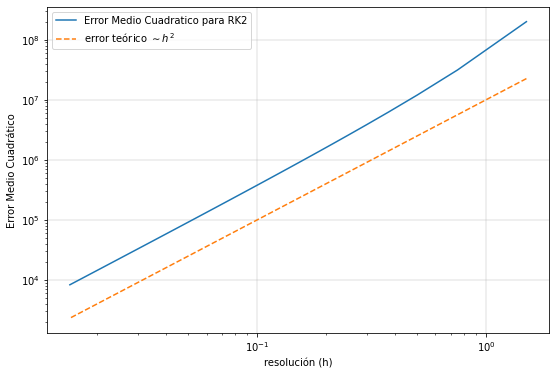

In [234]:
error_teorico = 1e7*np.ones(len(resoluciones))*np.array(resoluciones)**2

plt.figure(figsize=(9,6))
plt.plot(resoluciones, errores, label='Error Medio Cuadratico para RK2')
plt.plot(resoluciones, error_teorico,'--', label=r'error teórico $\sim h^2$')
plt.xlabel('resolución (h)')
plt.ylabel('Error Medio Cuadrático')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(linewidth=0.4)

# 3. Sistemas de Ecuaciones

Resolver el sistema de ecuaciones
$$\frac{dy_1}{dx}=-0.5y_1$$
$$\frac{dy_2}{dx}=4-0.3y_2-0.1y_1$$
suponiendo que en $x=0$, $y_1=4$ y $y_2=6$

In [14]:
def f1(y1): return -0.5*y1
def f2(y1,y2): return 4 - 0.3*y2 - 0.1*y1

## Con RK2

In [37]:
x = np.linspace(0,10,100)
h = x[1] - x[0]
y1, y2 = [], []
y1_prev, y2_prev = 4, 6
y1.append(y1_prev)
y2.append(y2_prev)
for i in range(1,len(x)):
    
    # Calculo de las k's
    k1_1 = f1(y1_prev)
    k1_2 = f2(y1_prev, y2_prev)
 
    y1_inter = y1_prev + k1_1*h
    y2_inter = y2_prev + k1_2*h
    k2_1 = f1(y1_inter)
    k2_2 = f2(y1_inter,y2_inter)
    
    # Funciones de incremento
    phi1 = 0.5*k1_1 + 0.5*k2_1
    phi2 = 0.5*k1_2 + 0.5*k2_2
    
    # Soluciones al siguiente paso de integración
    y1_new = y1_prev + phi1*h
    y2_new = y2_prev + phi2*h
    
    # Se guardan las soluciones
    y1.append(y1_new)
    y2.append(y2_new)
    
    # Se resetean los valores iniciales para continuar con el siguiente paso de integración
    y1_prev = y1_new
    y2_prev = y2_new

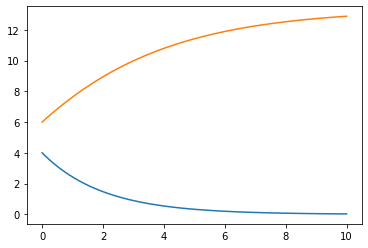

In [38]:
plt.plot(x,y1)
plt.plot(x,y2);

## Con RK4

In [34]:
x = np.linspace(0,10,100)
h = x[1] - x[0]
y1, y2 = [], []
y1_prev, y2_prev = 4, 6
y1.append(y1_prev)
y2.append(y2_prev)

for i in range(1,len(x)):
    k1_1 = f1(y1_prev)
    k1_2 = f2(y1_prev,y2_prev)
    
    y1_inter = y1_prev + 0.5*k1_1*h
    y2_inter = y2_prev + 0.5*k1_2*h
    k2_1 = f1(y1_inter)
    k2_2 = f2(y1_inter,y2_inter)
    
    y1_inter = y1_prev + 0.5*k2_1*h
    y2_inter = y2_prev + 0.5*k2_2*h
    k3_1 = f1(y1_inter)
    k3_2 = f2(y1_inter,y2_inter)
    
    y1_inter = y1_prev + k3_1*h
    y2_inter = y2_prev + k3_2*h
    k4_1 = f1(y1_inter)
    k4_2 = f2(y1_inter,y2_inter)
    
    phi1 = (1/6)*(k1_1 + 2*k2_1 + 2*k3_1 + k4_1)
    phi2 = (1/6)*(k1_2 + 2*k2_2 + 2*k3_2 + k4_2)
    
    y1_new = y1_prev + phi1*h
    y2_new = y2_prev + phi2*h
    
    y1.append(y1_new)
    y2.append(y2_new)
    
    y1_prev = y1_new
    y2_prev = y2_new

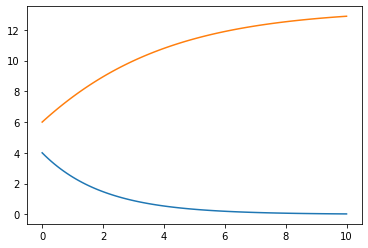

In [36]:
plt.plot(x,y1)
plt.plot(x,y2);

# Oscilador Armónico

In [341]:
k = 300 # N/m
m = 0.9 # kg
g = 9.8 # m/s2

In [389]:
def fv(x_val): return - (k/m)*x_val
def fx(v_val): return v_val

In [390]:
t = np.linspace(0,5,1000)
h = t[1] - t[0]
v, x = [], []
v_prev, x_prev = 0, 0.4
v.append(v_prev)
x.append(x_prev)
for i in range(1,len(t)):
    
    # Calculo de las k's
    k1_v = fv(x_prev)
    k1_x = fx(v_prev)
 
    v_inter = v_prev + k1_v*h
    x_inter = x_prev + k1_x*h
    k2_v = fv(x_inter)
    k2_x = fx(v_inter)
    
    # Funciones de incremento
    phiv = 0.5*k1_v + 0.5*k2_v
    phix = 0.5*k1_x + 0.5*k2_x
    
    # Soluciones al siguiente paso de integración
    v_new = v_prev + phiv*h
    x_new = x_prev + phix*h
    
    # Se guardan las soluciones
    v.append(v_new)
    x.append(x_new)
    
    # Se resetean los valores iniciales para continuar con el siguiente paso de integración
    v_prev = v_new
    x_prev = x_new

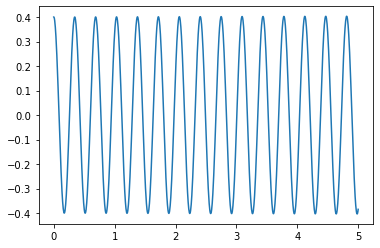

In [391]:
plt.plot(t,x)